#Pneumatic counterbalancing calculations and visualization

This notebook is meant to help calculate spring constants for spring counterbalancing on a pneumatic. There is also visualization of pneumatic torque and how the pneumatic travels as a function of time.

some notes:
- I am assuming the COG is in line with the pivot
- This notebook requires predetermined inputs, intuitively, to give the remaining required inputs
- `pneumatic_len` is actually length from pivot to pneumatic end (it was badly named)
- will add later as they come to mind

Import statments

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

###Inputs
***`pivot`*** - vector of pivot assuming the pivot is grounded at (0, 0)

***`cog`*** - center of gravity of pivot with same assumption as above

***`mass`*** - mass of pivot in kg

---

***`fixed_mount`*** - the point the spring is rigidly attached to

***`pivot_mount_dist`*** - the distance from pivot to spring mount


In [ ]:
#Pivot inputs
pivot = np.array([5, 5.]) #Vector from (0,0) to (5,5)
#Current assumption: COG is collinear with pivot but will change
cog = np.array([2., 2.]) 
mass = 2 #in lb

#Spring inputs
fixed_mount = np.array([0., 2.]) #This is a point
pivot_mount_dist = 2.
const = 10

Intermediate calculation to get moving_mount as a vector

In [ ]:
unit_vec = pivot / np.linalg.norm(pivot)
moving_mount = unit_vec * pivot_mount_dist
print(moving_mount)

[1.41421356 1.41421356]


###Plotting to visualize the pivot and spring setup

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

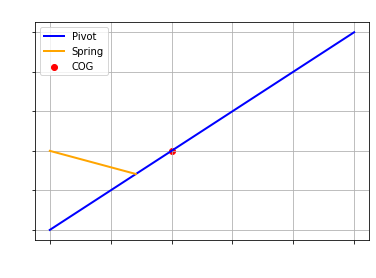

In [ ]:
x = np.array([0, pivot[0]])
y = np.array([0, pivot[1]])
plt.plot(x, y, linewidth=2, c="blue", label="Pivot")

x2 = np.array([fixed_mount[0], moving_mount[0]])
y2 = np.array([fixed_mount[1], moving_mount[1]])
plt.plot(x2, y2, linewidth=2, c="orange", label="Spring")
plt.title("Visualization", c="white")
plt.scatter(cog[0], cog[1], label="COG", c="red")

plt.grid()
plt.legend()

plt.xlabel("x", c="white")
plt.ylabel("y", c="white")
plt.xticks(c="white")
plt.yticks(c="white")

#Orange is spring, Blue is pivot

In [ ]:
weight = [0, -mass * 9.81] #This is needed for later
curr_torque = np.cross((weight), (cog)) #This is just there, not necessarily used

In [ ]:
#Helper function to find angle between two vectors

def angle(v1, v2):
  return math.acos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

###Spring constant
$F = kx$

$T = F x r$

In [ ]:
0#CALCULATE SPRING CONSTANT FOR LATER

distance_vec = moving_mount - fixed_mount #Vector between two spring mounts
theta = (angle(pivot, distance_vec))

F_s = curr_torque / ((np.sin(theta) * np.linalg.norm(moving_mount)))

spring_const = F_s / np.linalg.norm(distance_vec)
print(spring_const)


13.873435046880067


Sanity Check

In [ ]:
#check

F_s = spring_const * distance_vec

first_half = np.cross(F_s, moving_mount) 
second_half = (curr_torque)
print("Check is: " + (str) (np.isclose(first_half, second_half)))

Check is: True


###Helper functions for loops

$T_g = r x F_g$

$T_s = r_s x F_s$

$ = r_s x (k * dist)$




COG in terms of new pivot:
$PivotUnitVec * COGlength$ (***will change***)


In [ ]:
#More helpers
def getPivotMountVect(piv_new): #Returns the mounting vector at a new pivot arm
  unit = piv_new / np.linalg.norm(piv_new)
  #print(unit * pivot_mount_dist)
  return unit * pivot_mount_dist

def getTorqueSpring(piv_new): #Returns torque of spring at a new pivot arm
  pivMount = getPivotMountVect(piv_new)
  dist = (fixed_mount - pivMount)

  F_s_temp = spring_const * dist
  return np.linalg.norm(np.cross(F_s_temp, pivMount))

def getCurrentTorque(piv): #Returns torque of gravity at a new pivot arm
  cog_t = (piv/np.linalg.norm(piv)) * np.linalg.norm(cog) #NEEDS TO NOT BE DEPENDANT ON PIVOT POSITION
  weight = [0, -mass * 9.81]
  curr_torque = np.cross((cog_t), (weight))
  return np.linalg.norm(curr_torque)

Looping to get each value from 0 to 180

In [ ]:
x = np.linspace(0, 180, 180)
y1 = x.copy()
y2 = x.copy()

piv_len = np.linalg.norm(pivot)

for i in range(len(x)):
  piv_new = np.array([piv_len * np.cos(np.radians(x[i])), piv_len * np.sin(np.radians(x[i]))])
  torque_spring = getTorqueSpring(piv_new)
  y1[i] = torque_spring
  y2[i] = getCurrentTorque(piv_new)

#Graphing values!


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text major ticklabel objects>)

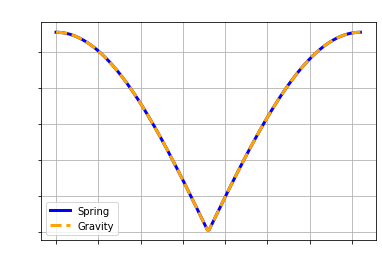

In [ ]:
plt.title("Counterbalanced graph", c="white")
plt.plot(x, y1, c="blue", linewidth=3, label="Spring")
plt.plot(x, y2, c="orange", linewidth=3, label="Gravity", linestyle="dashed")
plt.grid()
plt.legend()

plt.xlabel("Angle (deg)", c="white")
plt.ylabel("Torque (lbf)", c="white")
plt.xticks(c="white")
plt.yticks(c="white")

In [ ]:
print("Required spring constant given the spring mounts: " + (str) (spring_const))

Required spring constant given the spring mounts: 13.873435046880067


Pneumatic Inputs

In [ ]:
pneumatic_mount = np.array([2., 2.5])
pneumatic_base = np.array([-4., 2.])
pressure = 60 #Usually 60psi since that's the max FIRST allows
bore = 0.5

pneumatic_len = np.linalg.norm(pneumatic_mount)
base_vector_len = np.linalg.norm(pneumatic_base)

F_p_scalar = pressure * np.pi * bore ** 2 / 4 #don't need a vector for this, will become clear why later

Quick check of Setup

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

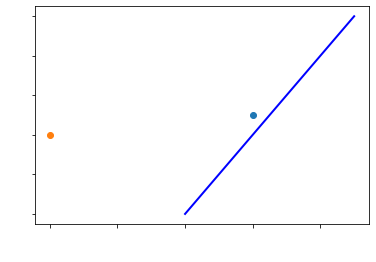

In [ ]:
plt.scatter(pneumatic_mount[0], pneumatic_mount[1])
plt.scatter(pneumatic_base[0], pneumatic_base[1])

x = np.array([0, pivot[0]])
y = np.array([0, pivot[1]])
plt.plot(x, y, linewidth=2, c="blue", label="Pivot")

plt.xlabel("x", c="white")
plt.ylabel("y", c="white")
plt.xticks(c="white")
plt.yticks(c="white")

Function to calculate the torque given the mount and base


In [ ]:
def getPneumaticTorque(mount):
  #This is just setup stuff for angles and lengths we will need
  theta_1 = np.arctan2(mount[0], mount[1])
  theta_2 = np.arctan2(pneumatic_base[0], pneumatic_base[1]) + math.pi
  distance_between = math.sqrt( (mount[0] - pneumatic_base[0]) ** 2 + (mount[1] - pneumatic_base[1]) ** 2 )
  theta = theta_2 - theta_1

  #This is the actual calculation
  sin_alpha = (np.sin(theta)*base_vector_len) / distance_between
  T_p = np.abs(F_p_scalar * pneumatic_len * sin_alpha) #This is why we don't need F_p as a vector. Not doing F x r but rather ||F|| * ||r|| * sin(a)
  return T_p

Setting up the arrays

In [ ]:
x = np.linspace(0, 180, 180)
y1 = x.copy()
y2 = x.copy()
y3 = x.copy()

piv_len = np.linalg.norm(pivot)

for i in range(len(x)):
  piv_new = np.array([piv_len * np.cos(np.radians(180 - x[i])), piv_len * np.sin(np.radians(180 - x[i]))]) #NOTE: This is 180 - x[i] since x[i] is angle between
                                                                                                           #pneumatic and the horizontal, start from pivot 
  torque_spring = getTorqueSpring(piv_new)                                                                 #and going down to x-axis
  y1[i] = torque_spring
  y2[i] = getCurrentTorque(piv_new)

  pneumatic = (piv_new / np.linalg.norm(piv_new)) * pneumatic_len
  y3[i] = getPneumaticTorque(pneumatic)

#Graphing everything

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text major ticklabel objects>)

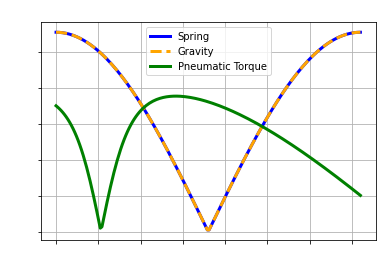

In [ ]:
plt.title("Counterbalanced graph", c="white")
plt.plot(x, y1, c="blue", linewidth=3, label="Spring")
plt.plot(x, y2, c="orange", linewidth=3, label="Gravity", linestyle="dashed")
plt.plot(x, y3, c="green", linewidth=3, label="Pneumatic Torque")
plt.grid()
plt.legend()
plt.xlabel("Angle (deg)", c="white")
plt.ylabel("Torque (lbf)", c="white")
plt.xticks(c="white")
plt.yticks(c="white")

getting the moment of intertia for later. This is a constant value since mass and pneumatic length are constants

In [ ]:

MOI = (mass * 0.453592) * (pneumatic_len * 0.0254) ** 2 #kg*m^2 

Process to get radians travelled / unit of time

$T = MOI * acceleration$

can calculate the angular acceleration

Integrate A(t) to get V(t), then integrate that to get S(t) where s is in radians/unit of time

In this case, output will be radians/interval

I am also returning velocity since I am using the approximation: $f(x_i) = y + ∆y = y'(x) * ∆x$ which means that I will need to keep adding velocity (since I'm integrating)

The function below returns the change in velocity and radians which is later added to the current angle and velocity

Calculus!

In [ ]:
def getRadianTravelled(torque, angle, velocity, interval):
  angular_acceleration = torque / MOI

  change_in_v = angular_acceleration * interval
  v_new = velocity + change_in_v

  #print("new = " + (str)(change_in_v))

  change_in_radians = velocity * interval

  #print("accel: " + (str)(angular_acceleration) + ", velocity new:  +" + (str)(v_new) + ", radians_traveled: " + (str)(change_in_radians))

  return np.array([change_in_radians, change_in_v])


This is just looping through until we have reached the angle.

1) Get a new pivot from `curr_angle` 

2) using it's unit vector, get the `pneumatic`

3) get the torque at that `pneumatic` using previously defined function

4) get the velocity and the angle travelled from above function

5) store these in an array which we will plot later

6) add this to all variables to update


In [ ]:

desired_angle = np.pi 

piv_len = np.linalg.norm(pivot)

curr_angle = 0
curr_v = 0
curr_t = 0.

x = []
t = []

while(curr_angle < desired_angle):
  piv_new = np.array([piv_len * np.cos(curr_angle), piv_len * np.sin(curr_angle)]) #technically angle should actually be np.pi - curr_angle but that's the same since we're taking cosine

  pneumatic = (piv_new / np.linalg.norm(piv_new)) * pneumatic_len

  #print(pneumatic)

  torque = getPneumaticTorque(pneumatic)


  arr = getRadianTravelled(torque, curr_angle, curr_v, 0.0001)
  curr_angle += arr[0]
  curr_v += arr[1]

  #print(curr_angle)

  curr_t += 0.0001
  t.append(curr_t)

  x.append(curr_angle)

##Graphing the pneumatic movement as a function of radians/time

Time took to deploy: 0.0473 seconds


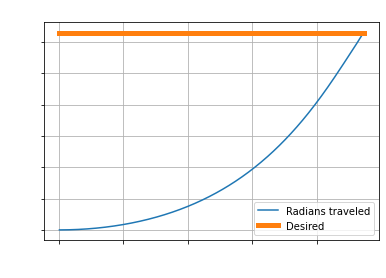

In [ ]:
plt.plot(t, x, label="Radians traveled")
plt.plot(t, np.linspace(desired_angle, desired_angle, len(t)), linewidth="5", label="Desired")
plt.grid()
plt.legend()
plt.title("Time vs. Radians Travelled", c="white")
plt.xlabel("Time", c="white")
plt.ylabel("Radians", c="white")
plt.xticks(c="white")
plt.yticks(c="white")

time = t[len(t)-1]
print("Time took to deploy: " + (str)(np.round(time, 5)) + " seconds")